---------------------------------------
# Working with [OCG GeoPackages](https://www.geopackage.org) in Python/[GeoPandas](http://geopandas.org)

* Create spatial and attribute data
* Examine data
  * tabular view
  * frame properties (column names and frame shape)
  * plotting
* Read and write layers to a `.gpkg` file
* Read and write layers to a compressed `.gpkg.gz` file

#### James Gaboardi, 01/2020

---------------------

In [1]:
%load_ext watermark
%watermark

2020-01-08T22:08:04-05:00

CPython 3.6.7
IPython 7.11.1

compiler   : GCC Clang 9.0.0 (tags/RELEASE_900/final)
system     : Darwin
release    : 19.2.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


## The [GeoPandas](http://geopandas.org) package can read and write `.gpkg` files

In [2]:
import geopandas
import shapely
%matplotlib inline
%watermark -iv

shapely   1.6.4.post2
geopandas 0.6.2



-------------------------
## Synthetic datasets: 3 points, a line, and a polygon
### Some raw Cartesian coordinates

In [3]:
xys = [(0,0), (1,2), (2, 0)]
xys

[(0, 0), (1, 2), (2, 0)]

### Instantiate `shapely` objects

In [4]:
points = [shapely.geometry.Point(xy) for xy in xys]
points

In [5]:
line = [shapely.geometry.LineString(xys)]
line

In [6]:
polygon = [shapely.geometry.Polygon([(0,0), (1,2), (2, 0)])]
polygon

### Create some attribute data for the points

In [7]:
ids = {"ID": ["one", "two", "three"]}

### Instantiate a `GeoDataFrame` for each set of objects

In [8]:
gdf1 = geopandas.GeoDataFrame(ids, geometry=points)
gdf1

,ID,geometry
0,one,POINT (0.00000 0.00000)
1,two,POINT (1.00000 2.00000)
2,three,POINT (2.00000 0.00000)


In [9]:
gdf2 = geopandas.GeoDataFrame(geometry=line)
gdf2

,geometry
0,"LINESTRING (0.00000 0.00000, 1.00000 2.00000, ..."


In [10]:
gdf3 = geopandas.GeoDataFrame(geometry=polygon)
gdf3

,geometry
0,"POLYGON ((0.00000 0.00000, 1.00000 2.00000, 2...."


## Examine the points `GeoDataFrame` properties

In [11]:
gdf1.columns

Index(['ID', 'geometry'], dtype='object')

In [12]:
gdf1.shape

(3, 2)

In [13]:
gdf1.head()

,ID,geometry
0,one,POINT (0.00000 0.00000)
1,two,POINT (1.00000 2.00000)
2,three,POINT (2.00000 0.00000)


## What we have so far

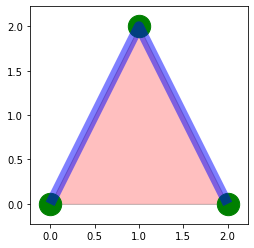

In [14]:
base = gdf3.plot(facecolor="red", edgecolor="black", alpha=.25)
gdf2.plot(ax=base, color="blue", linewidth=10, alpha=.5)
gdf1.plot(ax=base, color="green", markersize=500, alpha=1)

---------------------------------

## Writing `GeoPackages`
### Assign some variables we will be using again

In [15]:
file_name = "data/sample-geopackage.gpkg"
points_layer = "points"
line_layer = "line"
polygon_layer = "polygon"
driver = "GPKG"

### Write each `GeoDataFrame` as a layer within one `GeoPackage`

In [16]:
gdf1.to_file(file_name, layer=points_layer, driver=driver)
gdf2.to_file(file_name, layer=line_layer, driver=driver)
gdf3.to_file(file_name, layer=polygon_layer, driver=driver)

-------------------------------

## Reading `GeoPackages`

In [17]:
gdf4 = geopandas.read_file(file_name, layer=points_layer, driver=driver)
gdf5 = geopandas.read_file(file_name, layer=line_layer, driver=driver)
gdf6 = geopandas.read_file(file_name, layer=polygon_layer, driver=driver)

### Do the datasets match?

In [18]:
gdf1 == gdf4

,ID,geometry
0,True,True
1,True,True
2,True,True


In [19]:
gdf2 == gdf5

,geometry
0,True


In [20]:
gdf3 == gdf6

,geometry
0,True


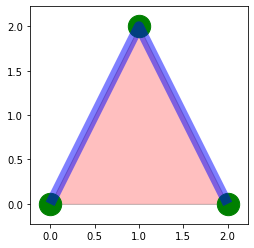

In [21]:
base = gdf6.plot(facecolor="red", edgecolor="black", alpha=.25)
gdf5.plot(ax=base, color="blue", linewidth=10, alpha=.5)
gdf4.plot(ax=base, color="green", markersize=500, alpha=1)

-------------------------------------------

## Compression is also an option

In [22]:
gz = ".gz"
file_name += gz
gzip = "gzip"

In [23]:
gdf1.to_file(file_name, layer=points_layer, driver=driver, compression=gzip)
gdf2.to_file(file_name, layer=line_layer, driver=driver, compression=gzip)
gdf3.to_file(file_name, layer=polygon_layer, driver=driver, compression=gzip)

In [24]:
gdf7 = geopandas.read_file(file_name, layer=points_layer, driver=driver, compression=gzip)
gdf8 = geopandas.read_file(file_name, layer=line_layer, driver=driver, compression=gzip)
gdf9 = geopandas.read_file(file_name, layer=polygon_layer, driver=driver, compression=gzip)

In [25]:
gdf1 == gdf7

,ID,geometry
0,True,True
1,True,True
2,True,True


In [26]:
gdf2 == gdf8

,geometry
0,True


In [27]:
gdf3 == gdf9

,geometry
0,True


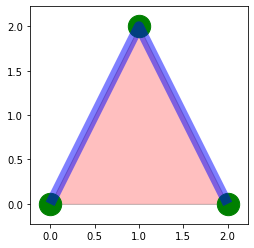

In [28]:
base = gdf9.plot(facecolor="red", edgecolor="black", alpha=.25)
gdf8.plot(ax=base, color="blue", linewidth=10, alpha=.5)
gdf7.plot(ax=base, color="green", markersize=500, alpha=1)

----------------------------------------